In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html

In [2]:
covid_df = pd.read_csv('owid-covid-data.csv')
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [3]:
covid_df.shape

(429435, 67)

In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [5]:
# convert date
covid_df['date'] = pd.to_datetime(covid_df['date'])

In [6]:
# checking missing values
covid_df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [7]:
covid_df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [8]:
covid_df.fillna(0, inplace=True)

In [9]:
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [10]:
covid_df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

In [11]:
covid_df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

In [12]:
# Filter a few countries
countries = ['United States', 'India', 'Brazil', 'Russia', 'UK']
covid_df = covid_df[covid_df['location'].isin(countries)]
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
50234,BRA,South America,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.00,...,17.9,0.0,2.20,75.88,0.76,215313504,0.0,0.0,0.0,0.0
50235,BRA,South America,Brazil,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.00,...,17.9,0.0,2.20,75.88,0.76,215313504,0.0,0.0,0.0,0.0
50236,BRA,South America,Brazil,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.00,...,17.9,0.0,2.20,75.88,0.76,215313504,0.0,0.0,0.0,0.0
50237,BRA,South America,Brazil,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.00,...,17.9,0.0,2.20,75.88,0.76,215313504,0.0,0.0,0.0,0.0
50238,BRA,South America,Brazil,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.00,...,17.9,0.0,2.20,75.88,0.76,215313504,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405120,USA,North America,United States,2024-07-31,103436829.0,0.0,0.0,1192546.0,0.0,88.43,...,24.6,0.0,2.77,78.86,0.93,338289856,0.0,0.0,0.0,0.0
405121,USA,North America,United States,2024-08-01,103436829.0,0.0,0.0,1192546.0,0.0,88.43,...,24.6,0.0,2.77,78.86,0.93,338289856,0.0,0.0,0.0,0.0
405122,USA,North America,United States,2024-08-02,103436829.0,0.0,0.0,1192546.0,0.0,88.43,...,24.6,0.0,2.77,78.86,0.93,338289856,0.0,0.0,0.0,0.0
405123,USA,North America,United States,2024-08-03,103436829.0,0.0,0.0,1192546.0,0.0,88.43,...,24.6,0.0,2.77,78.86,0.93,338289856,0.0,0.0,0.0,0.0


# A. Line Plot – Daily Cases Over Time

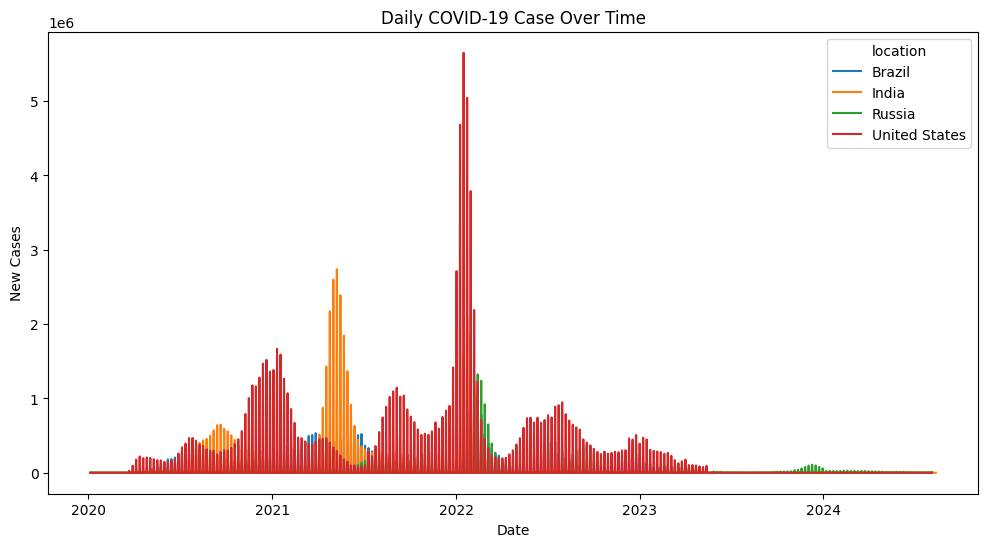

In [13]:
# A. Line Plot – Daily Cases Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=covid_df, x='date', y='new_cases', hue='location')
plt.title('Daily COVID-19 Case Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

# B. Heatmap – Correlation of Features

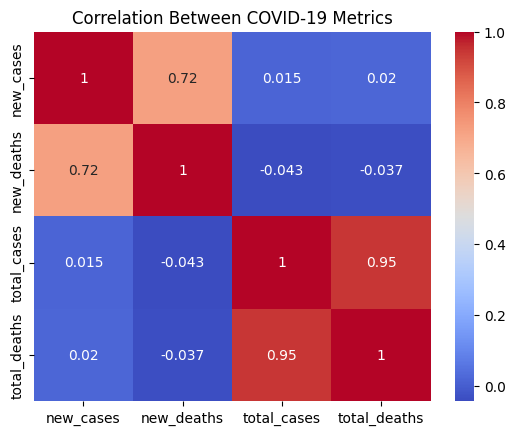

In [14]:
# B. Heatmap – Correlation of Features

corr = covid_df[['new_cases','new_deaths','total_cases','total_deaths']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between COVID-19 Metrics')
plt.show()

# C. Barplot – Total Cases by Country

/var/folders/ng/m4yd93hn3dd0fttqhm_f8prc0000gn/T/ipykernel_13800/3237548165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest, x='location', y='total_cases', palette="viridis")


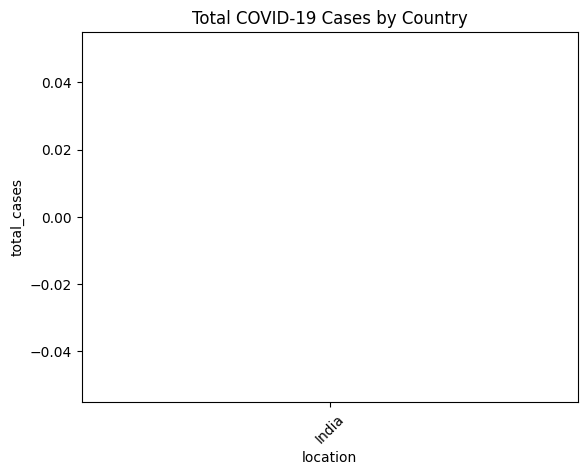

In [15]:
latest = covid_df[covid_df['date'] == covid_df['date'].max()]
sns.barplot(data=latest, x='location', y='total_cases', palette="viridis")
plt.title("Total COVID-19 Cases by Country")
plt.xticks(rotation=45)
plt.show()


# D. Scatter Plot – Vaccination vs Cases

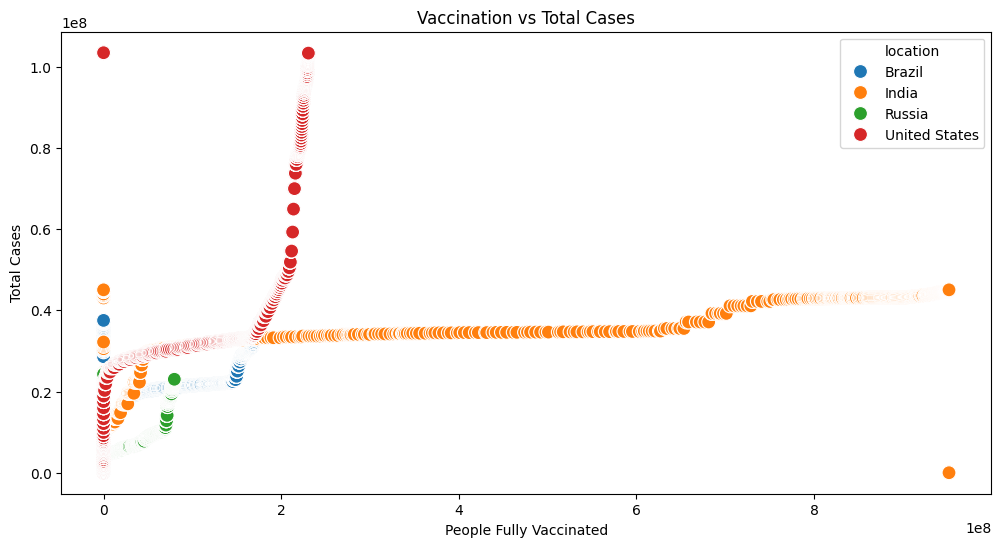

In [16]:
# D. Scatter Plot – Vaccination vs Cases
plt.figure(figsize=(12,6))
sns.scatterplot(data=covid_df, x='people_fully_vaccinated', y='total_cases', hue='location', s=100)
plt.title("Vaccination vs Total Cases")
plt.xlabel("People Fully Vaccinated")
plt.ylabel("Total Cases")
plt.show()



# E. Pairplot – Demographics vs COVID Metrics

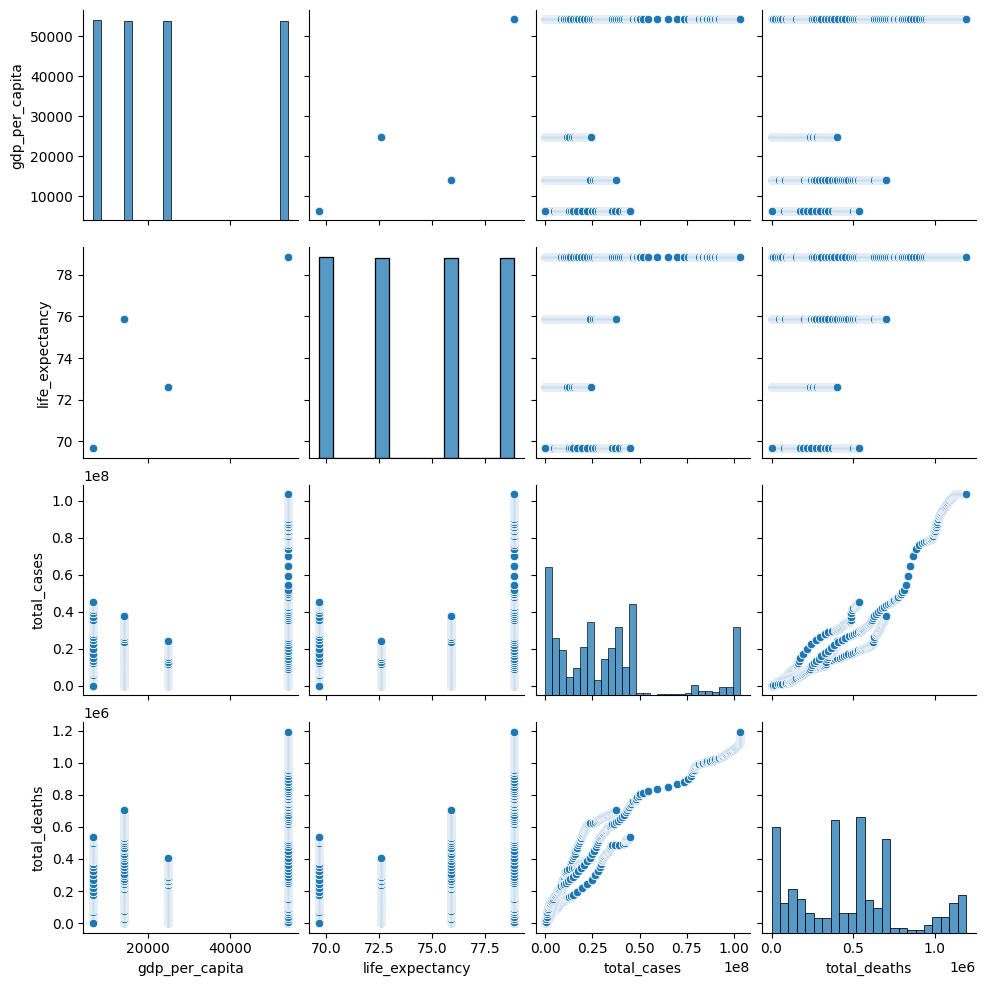

In [17]:
# E. Pairplot – Demographics vs COVID Metrics

demographics = covid_df[['gdp_per_capita','life_expectancy','total_cases','total_deaths']]
sns.pairplot(demographics)
plt.show()


# 7-Day Rolling Average Line Plot

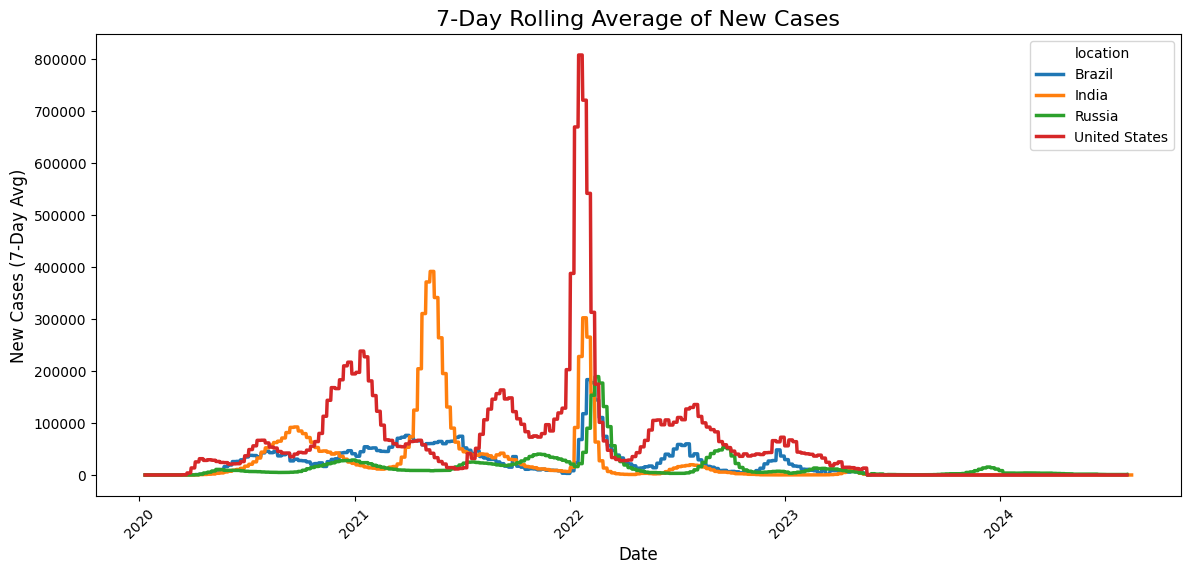

In [18]:
# # 7-Day Rolling Average Line Plot

covid_df['new_cases_7d_avg'] = covid_df.groupby('location')['new_cases'].transform(lambda x: x.rolling(7).mean())

plt.figure(figsize=(14,6))
sns.lineplot(data=covid_df, x='date', y='new_cases_7d_avg', hue='location', linewidth=2.5)
plt.title("7-Day Rolling Average of New Cases", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("New Cases (7-Day Avg)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Figure with plotly

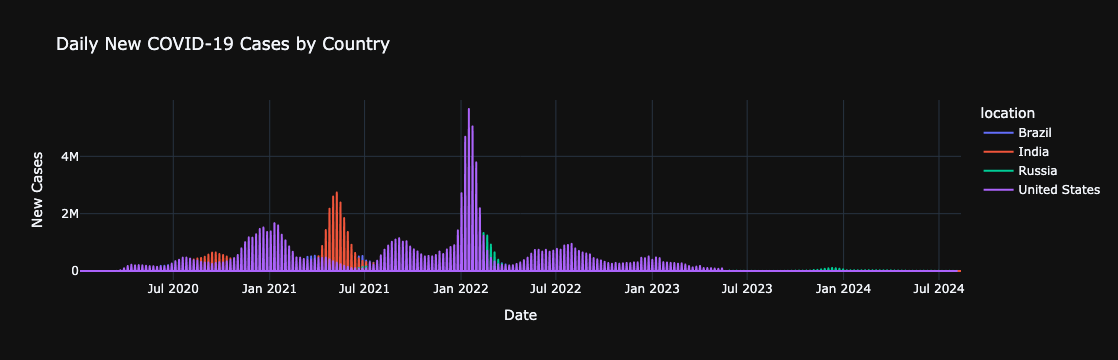

In [19]:
fig_line = px.line(covid_df,  x="date", y="new_cases", color="location",
              title="Daily New COVID-19 Cases by Country",
              labels={"new_cases":"New Cases", "date":"Date"},
              hover_data=["total_cases", "new_deaths"])
fig_line.update_layout(template='plotly_dark')
fig_line.show()

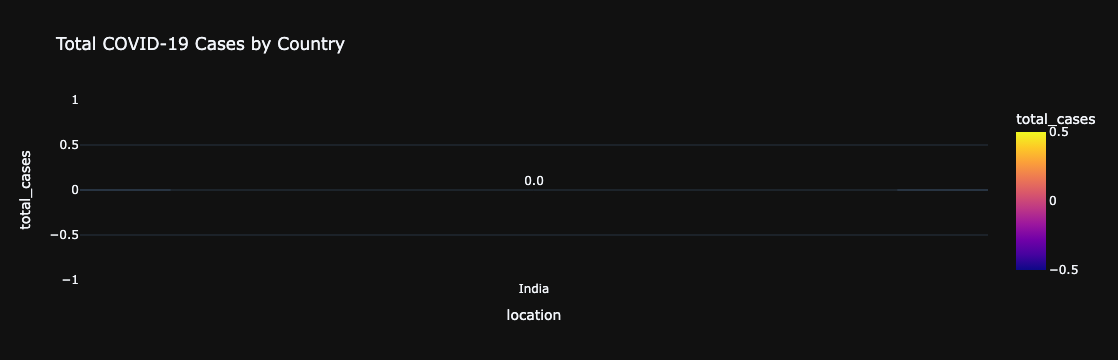

In [20]:
# Interactive Bar Chart – Total Cases by Country

fig_bar = px.bar(latest, x="location", y="total_cases",
             color="total_cases", text="total_cases",
             title="Total COVID-19 Cases by Country",
             hover_data=["new_cases","new_deaths"])
fig_bar.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_bar.update_layout(template="plotly_dark")
fig_bar.show()


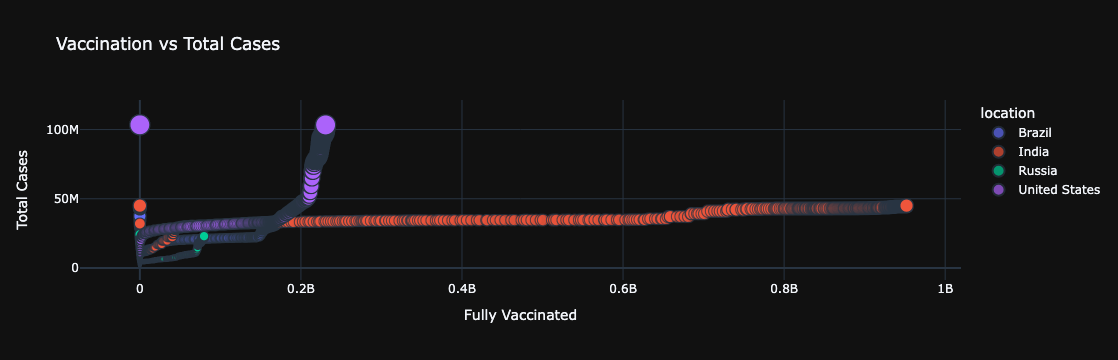

In [21]:
# Interactive Scatter – Vaccination vs Total Cases

fig_scatter = px.scatter(covid_df, x="people_fully_vaccinated", y="total_cases",
                 size="total_cases", color="location",
                 hover_name="location",
                 title="Vaccination vs Total Cases",
                 labels={"people_fully_vaccinated":"Fully Vaccinated", "total_cases":"Total Cases"})
fig_scatter.update_layout(template="plotly_dark")
fig_scatter.show()


/var/folders/ng/m4yd93hn3dd0fttqhm_f8prc0000gn/T/ipykernel_13800/1063050524.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




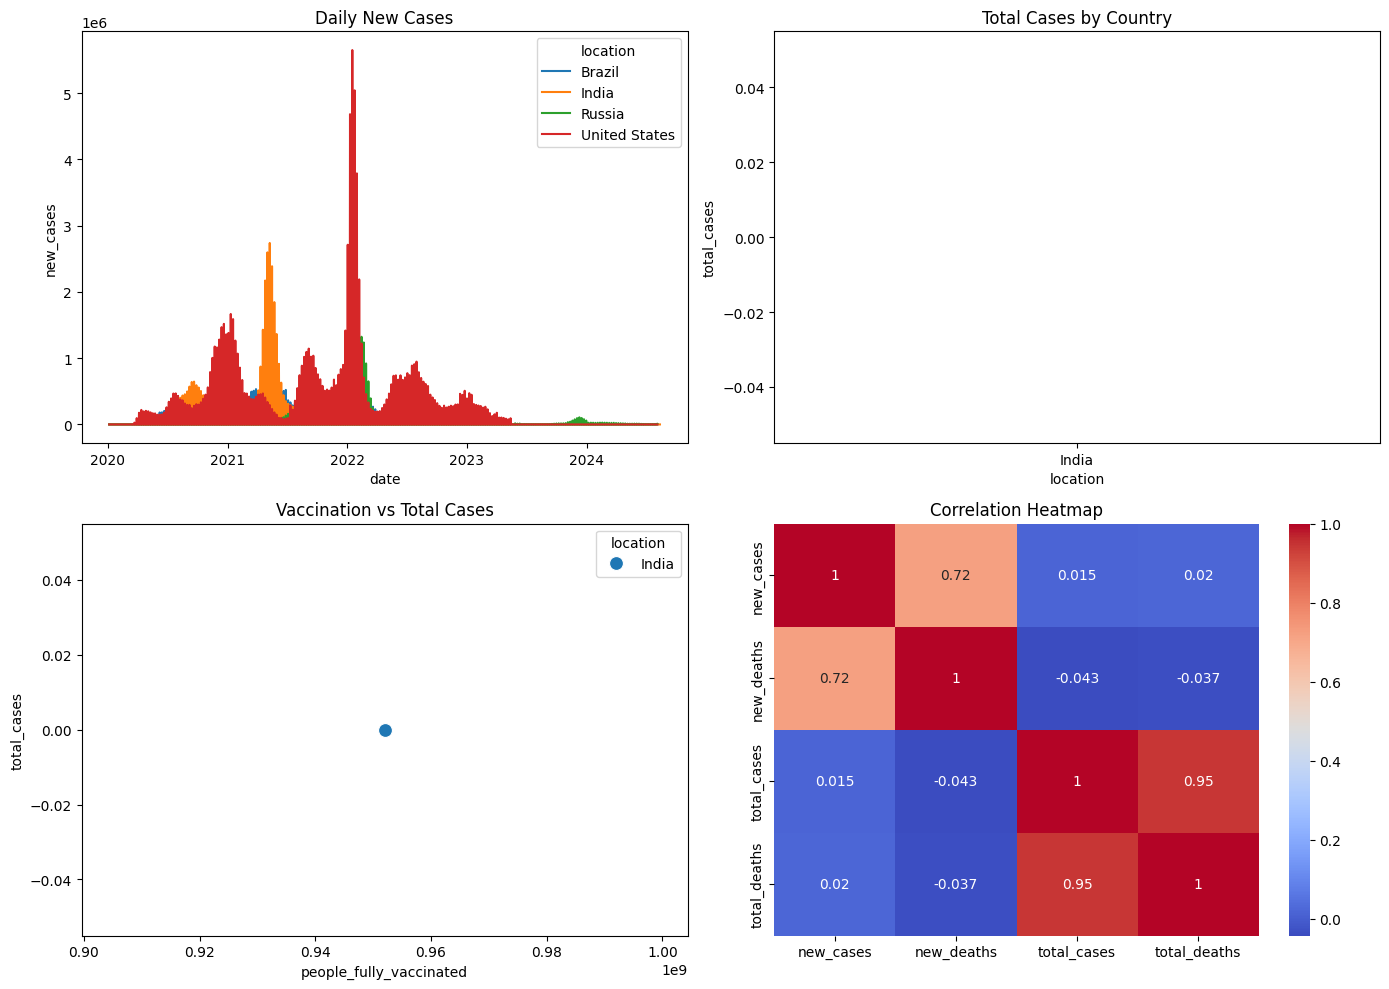

In [22]:
fig, axs = plt.subplots(2,2, figsize=(14,10))

# Daily cases line plot
sns.lineplot(data=covid_df, x='date', y='new_cases', hue='location', ax=axs[0,0])
axs[0,0].set_title("Daily New Cases")

# Total cases bar plot
sns.barplot(data=latest, x='location', y='total_cases', palette="magma", ax=axs[0,1])
axs[0,1].set_title("Total Cases by Country")

# Scatter plot Vaccination vs Cases
sns.scatterplot(data=latest, x='people_fully_vaccinated', y='total_cases', hue='location', s=100, ax=axs[1,0])
axs[1,0].set_title("Vaccination vs Total Cases")

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axs[1,1])
axs[1,1].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()


In [23]:
from dash import Dash, dcc, html, Input, Output, State
from dash.dcc import Download
from dash import dash_table
import io

all_metrics = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths']

# -----------------------------
# Initialize Dash app
# -----------------------------
app = Dash(__name__)

# -----------------------------
# Layout
# -----------------------------
app.layout = html.Div(style={'backgroundColor':'#111111','color':'white','padding':'20px'}, children=[
    html.H1("Professional COVID-19 Dashboard", style={'textAlign':'center'}),
    
    # Dropdowns for countries and metrics
    html.Div([
        html.Label("Select Countries:", style={'fontSize':'18px'}),
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} for country in countries],
            value=['United States','India'],
            multi=True
        ),
        html.Br(),
        html.Label("Select Metric for Comparison:", style={'fontSize':'18px'}),
        dcc.Dropdown(
            id='metric-dropdown',
            options=[{'label': metric.replace('_',' ').title(), 'value': metric} for metric in all_metrics],
            value='new_cases',
            multi=False
        )
    ], style={'width':'60%', 'margin':'auto'}),
    
    html.Br(),
    
    # Line plot
    html.Div([
        html.H2(id='line-title'),
        dcc.Graph(id='line-plot')
    ]),
    
    # Bar plot
    html.Div([
        html.H2("Total Cases by Country"),
        dcc.Graph(id='bar-plot')
    ]),
    
    # Scatter plot
    html.Div([
        html.H2("Vaccination vs Total Cases"),
        dcc.Graph(id='scatter-plot')
    ]),
    
    # Download button
    html.Div([
        html.Button("Download Filtered Data", id="btn-download", n_clicks=0, style={'margin':'10px','padding':'10px'}),
        Download(id="download-dataframe-csv")
    ], style={'textAlign':'center'}),
    
    # Insights
    html.Div([
        html.P("Insights:", style={'fontSize':'18px'}),
        html.Ul([
            html.Li("Select countries and metrics to explore COVID trends dynamically."),
            html.Li("Download the filtered dataset for further analysis."),
            html.Li("Interactive charts help analyze trends, peaks, and vaccination effects."),
            html.Li("Portfolio-ready dashboard showcasing data visualization skills.")
        ])
    ])
])

# -----------------------------
# Callbacks
# -----------------------------
@app.callback(
    Output('line-plot', 'figure'),
    Output('line-title', 'children'),
    Output('bar-plot', 'figure'),
    Output('scatter-plot', 'figure'),
    Input('country-dropdown', 'value'),
    Input('metric-dropdown', 'value')
)
def update_charts(selected_countries, selected_metric):
    filtered_df = covid_df[covid_df['location'].isin(selected_countries)]
    latest_filtered = filtered_df[filtered_df['date'] == filtered_df['date'].max()]
    
    # Line plot
    fig_line = px.line(filtered_df, x='date', y=selected_metric, color='location',
                       title=f'{selected_metric.replace("_"," ").title()} Over Time',
                       hover_data=['total_cases','new_deaths'])
    fig_line.update_layout(template='plotly_dark')
    
    # Bar plot
    fig_bar = px.bar(latest_filtered, x='location', y='total_cases', color='total_cases',
                     text='total_cases', hover_data=['new_cases','new_deaths'])
    fig_bar.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig_bar.update_layout(template='plotly_dark')
    
    # Scatter plot
    fig_scatter = px.scatter(latest_filtered, x='people_fully_vaccinated', y='total_cases',
                             size='total_cases', color='location',
                             hover_name='location',
                             title='Vaccination vs Total Cases',
                             labels={'people_fully_vaccinated':'Fully Vaccinated','total_cases':'Total Cases'})
    fig_scatter.update_layout(template='plotly_dark')
    
    line_title = f"Line Plot: {selected_metric.replace('_',' ').title()} Over Time"
    
    return fig_line, line_title, fig_bar, fig_scatter

# -----------------------------
# Callback for Download CSV
# -----------------------------
@app.callback(
    Output("download-dataframe-csv", "data"),
    Input("btn-download", "n_clicks"),
    State("country-dropdown", "value"),
    State("metric-dropdown", "value"),
    prevent_initial_call=True
)
def download_filtered_data(n_clicks, selected_countries, selected_metric):
    filtered_df = covid_df[covid_df['location'].isin(selected_countries)]
    # Optional: only include relevant columns
    columns_to_export = ['date','location','new_cases','new_deaths','total_cases','total_deaths',
                         'people_vaccinated','people_fully_vaccinated','population','gdp_per_capita']
    export_df = filtered_df[columns_to_export]
    return dcc.send_data_frame(export_df.to_csv, "filtered_covid_data.csv")

# -----------------------------
# Run app
# -----------------------------
if __name__ == '__main__':
    app.run(debug=True)

